<a href="https://colab.research.google.com/github/gcbirat12/Cat_or_Dog_using_TF_and_Deep_Learning/blob/main/Cat_or_Dog_using_TF_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATADIR = '/content/drive/MyDrive/PetImages'


In [ ]:
CATEGORIES = ["Dog","Cat"]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


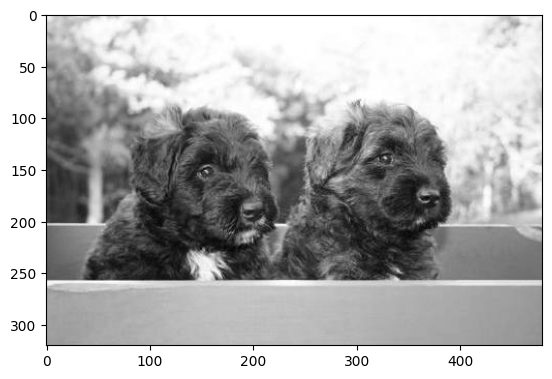

In [ ]:
for category in CATEGORIES:
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap ="gray")
    plt.show()
    break
  break


In [ ]:
print(img_array.shape)

(320, 480)


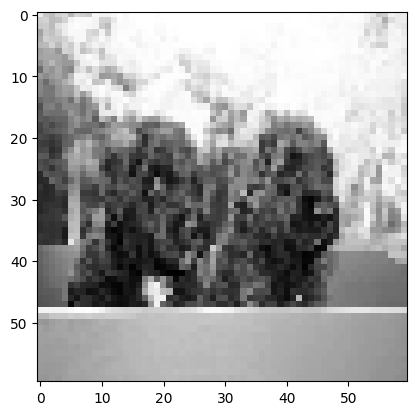

In [ ]:
IMG_SIZE = 60
new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

In [ ]:
training_data = []

def create_trainig_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR,category) #path to cats or dogs
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_trainig_data()



In [ ]:
print(len(training_data))

24946


In [ ]:
import random

random.shuffle(training_data)


In [ ]:
for sample in training_data[:10]:
  print(sample[1])

1
1
0
0
0
1
0
1
0
0


In [ ]:
X=[]
y=[]

In [ ]:
for features, label in training_data:
  X.append(features)
  y.append(label)

X=np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE,1)

In [ ]:
import pickle

In [ ]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [ ]:
X[1]

array([[[241],
        [239],
        [239],
        ...,
        [225],
        [223],
        [219]],

       [[239],
        [239],
        [237],
        ...,
        [225],
        [224],
        [223]],

       [[241],
        [236],
        [234],
        ...,
        [232],
        [227],
        [223]],

       ...,

       [[113],
        [147],
        [ 95],
        ...,
        [249],
        [251],
        [248]],

       [[104],
        [111],
        [100],
        ...,
        [244],
        [248],
        [252]],

       [[106],
        [181],
        [178],
        ...,
        [249],
        [251],
        [254]]], dtype=uint8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time


In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

In [ ]:
for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )
            y = np.array(y)
            model.fit(X, y,
                      batch_size=32,
                      epochs=3, #can be changed to more epochs for increased accuracy
                      validation_split=0.3,
                      callbacks=[tensorboard])
model.save('64x3-CNN.model')

3-conv-64-nodes-0-dense-1685109343
Epoch 1/3
546/546 [==============================] - 114s 208ms/step - loss: 0.6433 - accuracy: 0.6155 - val_loss: 0.5675 - val_accuracy: 0.7068
Epoch 2/3
546/546 [==============================] - 111s 203ms/step - loss: 0.5368 - accuracy: 0.7339 - val_loss: 0.5060 - val_accuracy: 0.7565
Epoch 3/3
546/546 [==============================] - 118s 216ms/step - loss: 0.4861 - accuracy: 0.7692 - val_loss: 0.4652 - val_accuracy: 0.7839


In [ ]:
import cv2
import tensorflow as tf

CATEGORIES = ["Dog", "Cat"]  # use this to convert prediction num to string value


def prepare(filepath):
    IMG_SIZE = 60
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
model = tf.keras.models.load_model("64x3-CNN.model")


In [ ]:
prediction = model.predict([prepare('/content/drive/MyDrive/cat2.jpeg')])


1/1 [==============================] - 0s 18ms/step


In [ ]:
print(CATEGORIES[int(prediction[0][0])])

Cat
